In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataframe = pd.read_csv('bank.csv',sep=";")

In [ ]:
dataframe.info()

In [ ]:
dataframe.nunique()

In [ ]:
dataframe.head()

In [ ]:
dataframe = dataframe.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome'], axis=1)

In [ ]:
dataframe.describe().T

In [ ]:
dataframe.nunique()

In [10]:
# dataframe.default.replace(['yes','no'],[1,0],inplace=True)

In [11]:
# dataframe['default','y','loan']=dataframe['default','y','loan'].replace(['yes','no'],[1,0],inplace=True)
dataframe.replace(['yes','no'],[1,0],inplace=True)

In [12]:
dataframe.head()

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0,1787,0,79,1,-1,0,0
1,33,services,0,4789,1,220,1,339,4,0
2,35,management,0,1350,0,185,1,330,1,0
3,30,management,0,1476,1,199,4,-1,0,0
4,59,blue-collar,0,0,0,226,1,-1,0,0


In [13]:
dataframe.shape

(4521, 10)

In [14]:
dataframe = pd.get_dummies(dataframe)

In [15]:
dataframe.shape

(4521, 21)

In [ ]:
dataframe.y.head()

In [17]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe,dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

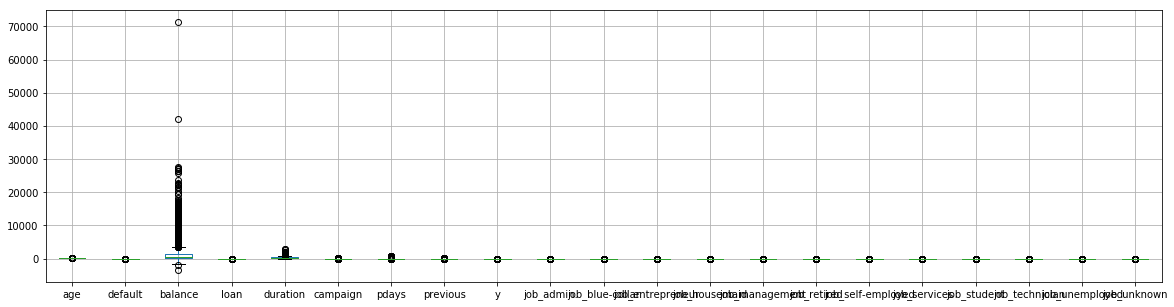

In [18]:
dataframe.boxplot(figsize=(20,5))

In [19]:
column = ['age','balance','duration','campaign','pdays','previous']
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

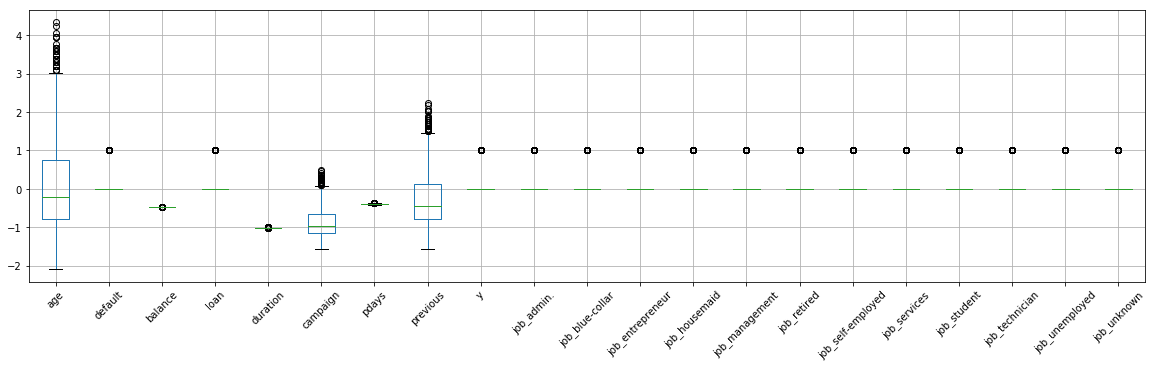

In [20]:
dataframe.boxplot(figsize=(20,5),rot=45,)

In [21]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,-1.116976e-16,1.000000,-2.096223,-0.772497,-0.205186,0.740332,4.333301
default,4521.0,1.681044e-02,0.128575,0.000000,0.000000,0.000000,0.000000,1.000000
balance,4521.0,-4.727006e-01,0.000332,-0.473397,-0.472957,-0.472769,-0.472455,-0.471261
loan,4521.0,1.528423e-01,0.359875,0.000000,0.000000,0.000000,0.000000,1.000000
duration,4521.0,-1.015796e+00,0.003848,-1.023863,-1.018769,-1.016585,-1.012947,-0.999120
campaign,4521.0,-8.983291e-01,0.321563,-1.572398,-1.146736,-0.964310,-0.660265,0.495102
pdays,4521.0,-3.971854e-01,0.009988,-0.418122,-0.404901,-0.399235,-0.389791,-0.353905
previous,4521.0,-3.203774e-01,0.590471,-1.558137,-0.776515,-0.441534,0.116767,2.238313
y,4521.0,1.152400e-01,0.319347,0.000000,0.000000,0.000000,0.000000,1.000000
job_admin.,4521.0,1.057288e-01,0.307524,0.000000,0.000000,0.000000,0.000000,1.000000


In [22]:
def split(dataframe):
    test_data = dataframe.tail(1000).reset_index(drop=True)
    return dataframe.head(len(dataframe)-1000).reset_index(), test_data.reset_index()

In [23]:
dataframe, test_data = split(dataframe)

In [24]:
dataframe.describe()

,index,age,default,balance,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,...,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000
mean,1760.000000,-0.000535,0.016189,-0.472701,0.157058,-1.015798,-0.898501,-0.397191,-0.320693,0.114172,...,0.038341,0.023573,0.217836,0.049986,0.040897,0.090315,0.019313,0.168986,0.028685,0.007668
std,1016.569476,1.005127,0.126218,0.000334,0.363907,0.003868,0.323212,0.010039,0.593499,0.318065,...,0.192046,0.151736,0.412834,0.217947,0.198081,0.286674,0.137641,0.374793,0.166943,0.087245
min,0.000000,-2.096223,0.000000,-0.473397,0.000000,-1.023863,-1.572398,-0.418122,-1.558137,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,880.000000,-0.772497,0.000000,-0.472957,0.000000,-1.018769,-1.146736,-0.404901,-0.776515,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1760.000000,-0.205186,0.000000,-0.472769,0.000000,-1.016585,-0.964310,-0.399235,-0.441534,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2640.000000,0.740332,0.000000,-0.472455,0.000000,-1.012947,-0.660265,-0.389791,0.116767,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3520.000000,4.333301,1.000000,-0.471261,1.000000,-0.999120,0.495102,-0.353905,2.238313,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
def KNN_Algo(dataframe,test_data):
    # stores the num rows in test data
    test_size = test_data.shape[0]
    # stores the num rows in dataframe
    data_size = dataframe.shape[0]
    # storing original outputs
    original_outputs = test_data.loc[:,'y']
    # storing the outputs of dataframe
    data_outputs = dataframe['y']
    # deleting the outputs from dataframe for computing
    dataframe = dataframe.drop('y',axis=1)
    #deleting the output rows as we'll be compuing on the basis of other rows
    test_data = test_data.drop('y', axis=1)
    predicted_outputs = pd.Series(np.zeros(test_size))
    Eucledian_dist = pd.DataFrame(columns=['dist','y'])
    k = 5
    for counter1 in range(0,test_size):
        for counter2 in range(0,data_size):
            Eucledian_dist.loc[counter2,'dist'] = np.sum(np.square(
                                                  np.subtract(test_data.iloc[counter1,:],dataframe.iloc[counter2,:]
                                                  )
                                                )
                                             )
            Eucledian_dist.loc[counter2,'y'] = data_outputs[counter2]
        Eucledian_dist.dist = np.power(Eucledian_dist.dist,0.5)
        Eucledian_dist = Eucledian_dist.sort_values(by=['dist'])
        print(Eucledian_dist.head(),'tail', Eucledian_dist.tail(),'uniques', Eucledian_dist.nunique())
        # If the sum of top k elements are x
        if((Eucledian_dist.y[:k]==1).sum() >(k/2)):
            predicted_outputs[counter1] = 1
        else: 
            predicted_outputs[counter1] = 0

    similars = (original_outputs[:]==predicted_outputs[:]).sum()
    accuracy  = similars/test_size
    print(accuracy)

In [26]:
# dataframe=dataframe.describe().T.loc[:,['min', 'max','std']].head(3)

In [ ]:
KNN_Algo(dataframe,test_data)

      dist  y
0  1.57079  0
2  2.00324  0
1    2.029  0
3  3.23533  0
4  4.98676  0 tail       dist  y
3516  3516  0
3517  3517  0
3518  3518  0
3519  3519  0
3520  3520  0 uniques dist    3521
y          2
dtype: int64
      dist  y
2  2.77249  0
1  2.95386  0
0  3.23696  0
4   3.3652  0
3  3.80499  0 tail       dist  y
3516  3515  0
3517  3516  0
3518  3517  0
3519  3518  0
3520  3519  0 uniques dist    3521
y          2
dtype: int64
      dist  y
3  1.73579  0
1  1.74698  0
2  1.79101  0
0   2.6482  0
5  3.49395  0 tail       dist  y
3516  3514  0
3517  3515  0
3518  3516  0
3519  3517  0
3520  3518  0 uniques dist    3521
y          2
dtype: int64
      dist  y
3  2.21835  0
2  2.30179  0
1   2.4227  0
4  2.55824  0
5  2.88067  0 tail       dist  y
3516  3513  0
3517  3514  0
3518  3515  0
3519  3516  0
3520  3517  0 uniques dist    3521
y          2
dtype: int64
      dist  y
5  1.79101  0
3  2.00324  0
2  2.49153  0
6  2.51487  0
7   3.4396  0 tail       dist  y
3516  3512  0
351

In [ ]:
dist = pd.DataFrame(columns=['dist','y'])

In [ ]:
(dist['dist'][:4]==1).sum()>1
# dist

In [ ]:
dist.info()

In [ ]:
np.sqrt(16.898+1j)

In [ ]:
np.power(1,0.5)

In [ ]:
# (dataframe['min'][:]==dataframe['min'][:]).sum()

In [ ]:
# ((dataframe.iloc[0,]==1).sum())